# Introduction



# 1.Import Libraries

In [90]:
import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset

In [91]:
df = pd.read_csv('C:/Users/nehap/Downloads/MRN.csv')
df.shape # dimensions

(5799, 14)

In [92]:
df.head()

,TBLKEY,WEIGHTKG,sex,HEIGHTCM,BSA_cpr,LBW_cpr,lbwkg_cpr,IBW_cpr,IBWKG_cpr,PatientIgADeficient,Age,Nurse_Full_Name,Allergies_type,ADR
0,200204,50.800000,F,162.56,3.00,0.00,0.00,120.59,54.7,No,79,Wendie Chadd,dg allergy,0
1,200217,74.789114,F,170.00,1.92,115.32,52.31,135.80,61.6,No,68,Angela Banks,fd & dg allergy,1
2,200218,134.000000,M,178.00,2.57,165.04,74.86,160.94,73.0,No,91,Erin Davis,Fd Allergy,1
3,200221,88.815556,F,160.00,1.94,108.38,49.16,115.52,52.4,No,88,Jen Brackley,fd & dg allergy,0
4,200222,83.095000,M,180.00,1.68,109.50,49.67,166.01,75.3,No,68,Angela Banks,Fd Allergy,0


In [93]:
df['Allergies_type']

0                  dg allergy
1             fd & dg allergy
2                  Fd Allergy
3             fd & dg allergy
4                  Fd Allergy
                ...          
5794    no fd & no dg allergy
5795          fd & dg allergy
5796               Fd Allergy
5797               Fd Allergy
5798               dg allergy
Name: Allergies_type, Length: 5799, dtype: object

### Check the missing values
In my dataset there no missing vaules so,it is additional step for this dataset.

In [94]:
missing_cols=df.isnull().sum()/df.shape[0]
missing_cols=missing_cols[missing_cols>0]
missing_cols

Series([], dtype: float64)

In [95]:
# over view of dataset
df.set_index('TBLKEY',inplace=True)
df.head()

,WEIGHTKG,sex,HEIGHTCM,BSA_cpr,LBW_cpr,lbwkg_cpr,IBW_cpr,IBWKG_cpr,PatientIgADeficient,Age,Nurse_Full_Name,Allergies_type,ADR
TBLKEY,,,,,,,,,,,,,
200204,50.800000,F,162.56,3.00,0.00,0.00,120.59,54.7,No,79,Wendie Chadd,dg allergy,0
200217,74.789114,F,170.00,1.92,115.32,52.31,135.80,61.6,No,68,Angela Banks,fd & dg allergy,1
200218,134.000000,M,178.00,2.57,165.04,74.86,160.94,73.0,No,91,Erin Davis,Fd Allergy,1
200221,88.815556,F,160.00,1.94,108.38,49.16,115.52,52.4,No,88,Jen Brackley,fd & dg allergy,0
200222,83.095000,M,180.00,1.68,109.50,49.67,166.01,75.3,No,68,Angela Banks,Fd Allergy,0


In [96]:
num_cols=df.select_dtypes(include=['int64']).columns
ctg_cols=df.select_dtypes(include=['object']).columns
print('Numerical Cols=',num_cols)
print('Categorical Cols=',ctg_cols)

Numerical Cols= Index(['Age', 'ADR'], dtype='object')
Categorical Cols= Index(['sex', 'PatientIgADeficient', 'Nurse_Full_Name', 'Allergies_type'], dtype='object')


In [97]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]
pd.DataFrame(dict,index=["unique"]).transpose()

,unique
WEIGHTKG,3863
sex,2
HEIGHTCM,122
BSA_cpr,237
LBW_cpr,2277
lbwkg_cpr,2277
IBW_cpr,105
IBWKG_cpr,105
PatientIgADeficient,1
Age,99


### Converting Age to bins

In [98]:
print('Min Age =',df.Age.min())
print('Max Age =',df.Age.max())

Min Age = 1
Max Age = 101


In [99]:
df['Age_bins']=pd.cut(df.Age,bins=(0,21,90,101),labels=["1-21","22-60","61-90+"])
df[['Age','Age_bins']].drop_duplicates(subset=['Age_bins']).reset_index(drop=True)

,Age,Age_bins
0,79,22-60
1,91,61-90+
2,17,1-21


In [100]:
df1=df[['WEIGHTKG','HEIGHTCM','BSA_cpr','lbwkg_cpr','IBWKG_cpr','Age']]
df1.shape

(5799, 6)

In [101]:
#Standardize data to bring them in same scale which are on different scale.
std=MinMaxScaler()
arr1=std.fit_transform(df1)
arr1

array([[0.21183928, 0.70114943, 0.79824561, 0.        , 0.07314888,
        0.78      ],
       [0.32124374, 0.73481763, 0.48245614, 0.40478217, 0.08237607,
        0.67      ],
       [0.59128016, 0.77102   , 0.67251462, 0.57927726, 0.09762099,
        0.9       ],
       ...,
       [0.45596753, 0.77011494, 0.58479532, 0.54700921, 0.09762099,
        0.49      ],
       [0.54904912, 0.70114943, 0.61403509, 0.47852666, 0.07916661,
        0.64      ],
       [0.41870753, 0.68965517, 0.52631579, 0.38265109, 0.07007315,
        0.43      ]])

In [102]:
#Standardize data to bring them in same scale which are on different scale.
#std= StandardScaler()
#arr1=std.fit_transform(df1)
#arr1

In [103]:
from sklearn.cluster import KMeans
df1['Clusters']=result_cluster
df1['Clusters'].value_counts()

0    2105
1    1953
2    1741
Name: Clusters, dtype: int64

In [104]:
d1=df[['sex','Age_bins','ADR','Allergies_type']].reset_index(drop=True)
df1_comb=pd.concat([df1.reset_index(drop=True),d1],axis=1)
df1_comb.head()

,WEIGHTKG,HEIGHTCM,BSA_cpr,lbwkg_cpr,IBWKG_cpr,Age,Clusters,sex,Age_bins,ADR,Allergies_type
0,50.800000,162.56,3.00,0.00,54.7,79,0,F,22-60,0,dg allergy
1,74.789114,170.00,1.92,52.31,61.6,68,1,F,22-60,1,fd & dg allergy
2,134.000000,178.00,2.57,74.86,73.0,91,1,M,61-90+,1,Fd Allergy
3,88.815556,160.00,1.94,49.16,52.4,88,0,F,22-60,0,fd & dg allergy
4,83.095000,180.00,1.68,49.67,75.3,68,2,M,22-60,0,Fd Allergy


In [105]:
df_proto=pd.DataFrame(arr1,columns=['WEIGHTKG','HEIGHTCM','BSA_cpr','lbwkg_cpr','IBWKG_cpr','Age'])
df_proto.head()

,WEIGHTKG,HEIGHTCM,BSA_cpr,lbwkg_cpr,IBWKG_cpr,Age
0,0.211839,0.701149,0.798246,0.000000,0.073149,0.78
1,0.321244,0.734818,0.482456,0.404782,0.082376,0.67
2,0.591280,0.771020,0.672515,0.579277,0.097621,0.90
3,0.385213,0.689565,0.488304,0.380407,0.070073,0.87
4,0.359123,0.780071,0.412281,0.384353,0.100697,0.67


In [106]:
d2=pd.concat([df_proto,d1],axis=1)
d2.head()

,WEIGHTKG,HEIGHTCM,BSA_cpr,lbwkg_cpr,IBWKG_cpr,Age,sex,Age_bins,ADR,Allergies_type
0,0.211839,0.701149,0.798246,0.000000,0.073149,0.78,F,22-60,0,dg allergy
1,0.321244,0.734818,0.482456,0.404782,0.082376,0.67,F,22-60,1,fd & dg allergy
2,0.591280,0.771020,0.672515,0.579277,0.097621,0.90,M,61-90+,1,Fd Allergy
3,0.385213,0.689565,0.488304,0.380407,0.070073,0.87,F,22-60,0,fd & dg allergy
4,0.359123,0.780071,0.412281,0.384353,0.100697,0.67,M,22-60,0,Fd Allergy


### Elbow method to find numbers of clusters

In [107]:
#Choosing optimal K
SSE = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 7)
    kmeans.fit(arr1)
    SSE.append(kmeans.inertia_)

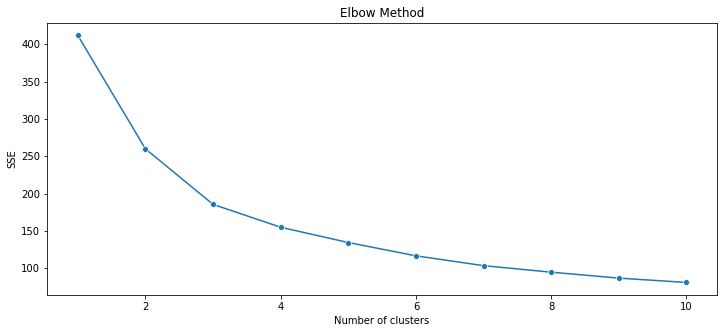

In [108]:
plt.figure(figsize=(12,5))
sns.lineplot(range(1, 11), SSE,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

### K-Prototype Algorithm (Number of Clusters = 3)

In [109]:
kproto_clusters=KPrototypes(n_clusters=3,random_state=7,init="Cao")
result_cluster=kproto_clusters.fit_predict(d2,categorical=[6,7,9])

In [110]:
d2['Clusters']=result_cluster
d2['Clusters'].value_counts()

0    2105
1    1953
2    1741
Name: Clusters, dtype: int64

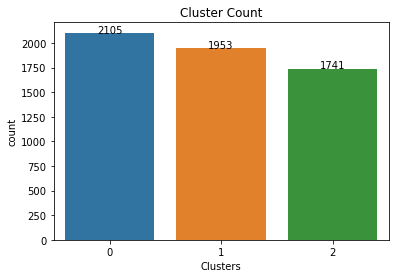

In [111]:
ax=sns.countplot(x=d2.Clusters)
for index, row in pd.DataFrame(d2['Clusters'].value_counts()).iterrows():
    ax.text(index,row.values[0], str(round(row.values[0])),color='black', ha="center")
    #print(index,row.values[0])
plt.title('Cluster Count')
plt.show()

### Clusters Centroid

In [112]:
kproto_clusters.cluster_centroids_

array([['0.3049711804437537', '0.6938216267892406', '0.4366615271353396',
        '0.35001620230772995', '0.07182668651591836',
        '0.5646650831353958', '0.0', 'F', '22-60', 'fd & dg allergy'],
       ['0.3421320234501293', '0.717694956280265', '0.47598835799175454',
        '0.39917338583382866', '0.07964497564001292',
        '0.563819764464926', '1.0', 'F', '22-60', 'fd & dg allergy'],
       ['0.38791575188657385', '0.7665099890004945',
        '0.5307714528519248', '0.49296893636292244',
        '0.09683355754497072', '0.5738483630097605', '0.0', 'M', '22-60',
        'no fd & no dg allergy']], dtype='<U32')

In [113]:
d2.drop(['Clusters'],axis=1,inplace=True)
d3=pd.concat([df1.reset_index(drop=True),d2],axis=1)
d3.head()

,WEIGHTKG,HEIGHTCM,BSA_cpr,lbwkg_cpr,IBWKG_cpr,Age,Clusters,WEIGHTKG,HEIGHTCM,BSA_cpr,lbwkg_cpr,IBWKG_cpr,Age,sex,Age_bins,ADR,Allergies_type
0,50.800000,162.56,3.00,0.00,54.7,79,0,0.211839,0.701149,0.798246,0.000000,0.073149,0.78,F,22-60,0,dg allergy
1,74.789114,170.00,1.92,52.31,61.6,68,1,0.321244,0.734818,0.482456,0.404782,0.082376,0.67,F,22-60,1,fd & dg allergy
2,134.000000,178.00,2.57,74.86,73.0,91,1,0.591280,0.771020,0.672515,0.579277,0.097621,0.90,M,61-90+,1,Fd Allergy
3,88.815556,160.00,1.94,49.16,52.4,88,0,0.385213,0.689565,0.488304,0.380407,0.070073,0.87,F,22-60,0,fd & dg allergy
4,83.095000,180.00,1.68,49.67,75.3,68,2,0.359123,0.780071,0.412281,0.384353,0.100697,0.67,M,22-60,0,Fd Allergy


In [130]:
# Checking the clusters created
data = pd.DataFrame(d3['Clusters'].value_counts())
data

,Clusters
0,2105
1,1953
2,1741


In [131]:
replace_map = [d3,{'Allergies_type': {'dg allergy': 0, 'fd & dg allergy': 1, 'Fd Allergy': 2, ' no fd & no dg allergy': 3}}]


In [139]:
d3.head()

,WEIGHTKG,HEIGHTCM,BSA_cpr,lbwkg_cpr,IBWKG_cpr,Age,Clusters,WEIGHTKG,HEIGHTCM,BSA_cpr,lbwkg_cpr,IBWKG_cpr,Age,sex,Age_bins,ADR,Allergies_type
0,50.800000,162.56,3.00,0.00,54.7,79,0,0.211839,0.701149,0.798246,0.000000,0.073149,0.78,F,22-60,0,dg allergy
1,74.789114,170.00,1.92,52.31,61.6,68,1,0.321244,0.734818,0.482456,0.404782,0.082376,0.67,F,22-60,1,fd & dg allergy
2,134.000000,178.00,2.57,74.86,73.0,91,1,0.591280,0.771020,0.672515,0.579277,0.097621,0.90,M,61-90+,1,Fd Allergy
3,88.815556,160.00,1.94,49.16,52.4,88,0,0.385213,0.689565,0.488304,0.380407,0.070073,0.87,F,22-60,0,fd & dg allergy
4,83.095000,180.00,1.68,49.67,75.3,68,2,0.359123,0.780071,0.412281,0.384353,0.100697,0.67,M,22-60,0,Fd Allergy


In [155]:
d3.head()

,WEIGHTKG,HEIGHTCM,BSA_cpr,lbwkg_cpr,IBWKG_cpr,Age,Clusters,WEIGHTKG,HEIGHTCM,BSA_cpr,lbwkg_cpr,IBWKG_cpr,Age,sex,Age_bins,ADR,Allergies_type
0,50.800000,162.56,3.00,0.00,54.7,79,0,0.211839,0.701149,0.798246,0.000000,0.073149,0.78,F,22-60,0,dg allergy
1,74.789114,170.00,1.92,52.31,61.6,68,1,0.321244,0.734818,0.482456,0.404782,0.082376,0.67,F,22-60,1,fd & dg allergy
2,134.000000,178.00,2.57,74.86,73.0,91,1,0.591280,0.771020,0.672515,0.579277,0.097621,0.90,M,61-90+,1,Fd Allergy
3,88.815556,160.00,1.94,49.16,52.4,88,0,0.385213,0.689565,0.488304,0.380407,0.070073,0.87,F,22-60,0,fd & dg allergy
4,83.095000,180.00,1.68,49.67,75.3,68,2,0.359123,0.780071,0.412281,0.384353,0.100697,0.67,M,22-60,0,Fd Allergy
